<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week5_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 3***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---



# ***D-1 PERCOBAAN HISTOGRAM***

In [10]:
#Load Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

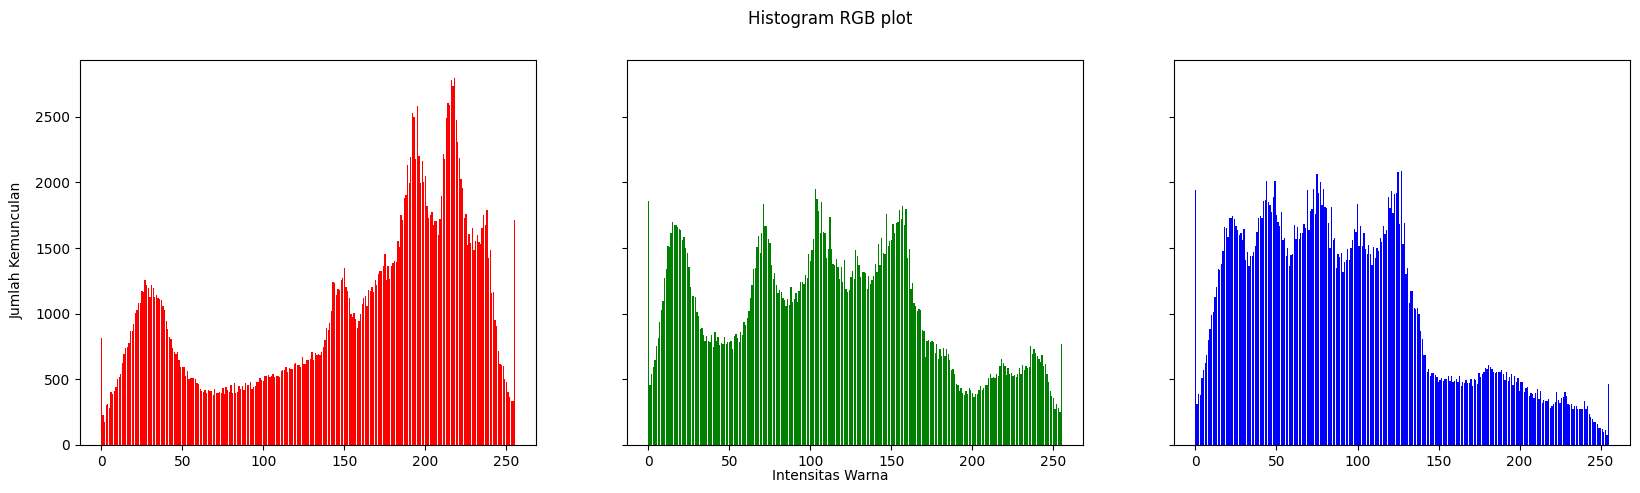

In [15]:
#Membuat histogram citra

img = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height):
  for x in range(0,width):
    red[img[y,x,0]] += 1
    green[img[y,x,1]] += 1
    blue[img[y,x,2]] += 1

names = np.arange(256)
fig, axis = plt.subplots(1, 3, figsize=(20,5), sharex = True, sharey = True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axis[0].bar(names, red, color = 'red')
axis[1].bar(names, green, color = 'green')
axis[2].bar(names, blue, color = 'blue')




---


# ***PERTANYAAN PRAKTIKUM D1***

1. **Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**


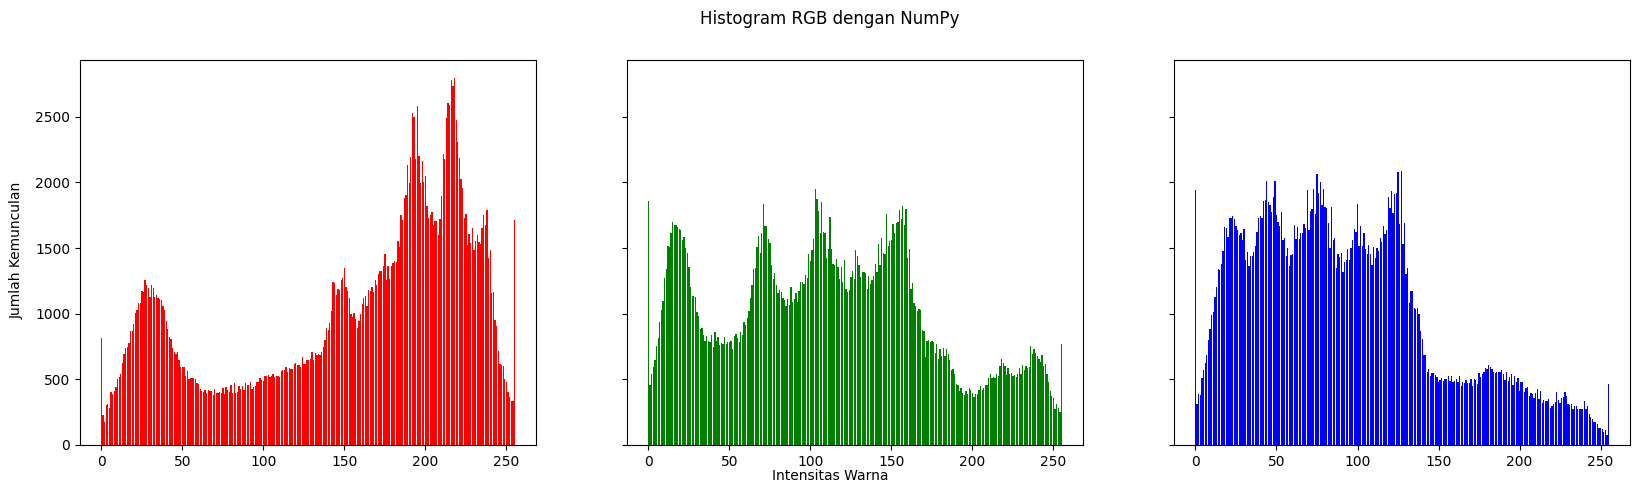

In [18]:
#1 Membuat histogram dengan NumPy

# Histogram dengan numpy
red_hist, bins = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_hist, _  = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_hist, _   = np.histogram(img[:,:,2], bins=256, range=(0,256))

# Plot hasil
fig, axis = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB dengan NumPy')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axis[0].bar(bins[:-1], red_hist, color='red')
axis[1].bar(bins[:-1], green_hist, color='green')
axis[2].bar(bins[:-1], blue_hist, color='blue')

plt.show()

**Hasilnya Menunjukkan output yang sama namun dengan versi yang lebih ringkas**

2. **Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.**

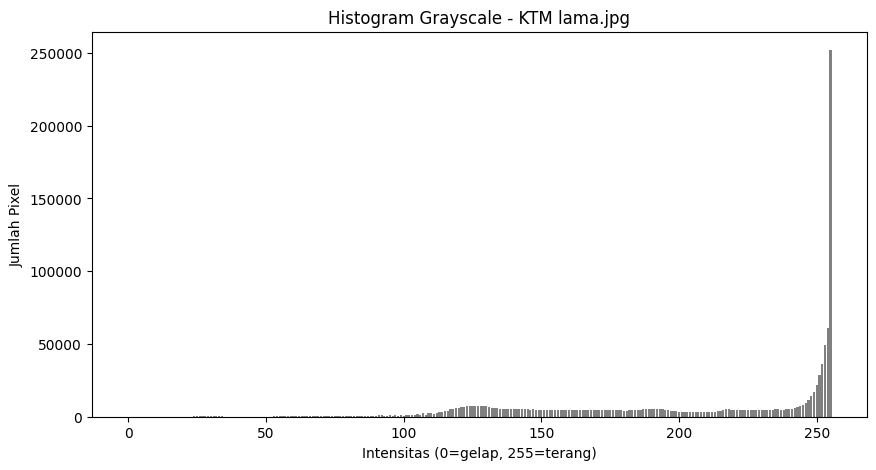

In [19]:
ktm = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/KTM lama.jpg')

# Hitung histogram
hist, bins = np.histogram(ktm, bins=256, range=(0,256))

# Plot histogram
plt.figure(figsize=(10,5))
plt.title('Histogram Grayscale - KTM lama.jpg')
plt.xlabel('Intensitas (0=gelap, 255=terang)')
plt.ylabel('Jumlah Pixel')
plt.bar(bins[:-1], hist, color='gray')
plt.show()

**Dari hasil histogram diatas menunjukkan bahwa histogram pada ktm menunjukkan bahwa intensitas gambarnya adalah terang dimana ditunjukkan dengan penumpukan pada sebelah kanan**